In [54]:
import numpy as np 
import pandas as pd 
pd.set_option('max_colwidth',400)
import matplotlib.pyplot as plt
import json
import pickle


In [55]:
#test get business data
biz_f = open('../input/yelp_academic_dataset_business.json')
biz_df = pd.DataFrame([json.loads(x) for x in biz_f.readlines()])
biz_f.close()

In [56]:
biz_df=biz_df.dropna()

In [57]:
biz_df.head(3)

address  ...  state
1            30 Eglinton Avenue W  ...     ON
2       10110 Johnston Rd, Ste 15  ...     NC
4  4209 Stuart Andrew Blvd, Ste F  ...     NC

[3 rows x 14 columns]

In [58]:
restaurant = biz_df[biz_df.apply(lambda x: 'Restaurants' in x['categories'], axis=1)]

In [59]:
restaurant.shape

(44100, 14)

In [60]:
# Load Yelp reviews data
review_file = open('../input/yelp_academic_dataset_review.json')
review_df = pd.DataFrame([json.loads(next(review_file)) for x in range(biz_df.shape[0])])
review_file.close()

In [61]:
review_df.head()

business_id           ...                           user_id
0  ujmEBvifdJM6h6RLv4wQIg           ...            hG7b0MtEbXx5QzbzE6C_VA
1  NZnhc2sEQy3RmzKTZnqtwQ           ...            yXQM5uF2jS6es16SJzNHfg
2  WTqjgwHlXbSFevF32_DJVw           ...            n6-Gk65cPZL6Uz8qRm3NYw
3  ikCg8xy5JIg_NGPx-MSIDA           ...            dacAIZ6fTM6mqwW5uxkskg
4  b1b1eb3uo-w561D0ZfCEiQ           ...            ssoyf2_x0EQMed6fgHeMyQ

[5 rows x 9 columns]

In [62]:
#only use 2 years data
review_df=review_df[review_df.date>='2017-01-01']

In [63]:
review_df.shape

(45949, 9)

In [64]:
#join dataframe
restaurant_reviews = restaurant.merge(review_df, on='business_id', how='inner')

In [65]:
r_reviews=restaurant_reviews[['stars_y','categories','text']]

In [66]:
r_reviews.shape

(27206, 3)

In [67]:
r_reviews.head()

stars_y                                                                                                                                                                                                       ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    text
0      3.0                                                                                                                                                                                                       ...                                                                                                                                                                                                         My girlfriend and I went for dinner at Emerald Chinese after a Thursday night workout.\n\nWe arrived around 7:30pm and were seated after a short wait.  After browsing the menu and a brief discussion with our waiter, we ordered seafood noodles and a 3 item mix meat plate (BBQ pork, chicken, and duck)\n\nThe food came soon thereafter and it was hot and delicious.  There was large portions and lo...
1      1.0                                                                                                                                                                                                       ...                                                                                                                                                                                                         I went at 230 on a Monday. It was dimsum \n\nI hated every second I was there, the carts were going around but the ladies kept ignoring us and I don't understand why. \n\nwe got gar how & a spinach dumpling. \n\nAfter that not a single cart were go by and we sat for so long till I finally I gave up \n\nwe went to pay and it was 14$ which is soooo high for what we got ...... \n\nI'll never ever...
2      4.0                                                                                                                                                                                                       ...                                                                                                                                                                                                                                                                                                                                                                      The dimsum here is actually alright. Food was good relative to its price. Servers were nice despite language barriers. Nicely lit and seemingly tidy/clean environment, with beautiful decor. Wasn't the best dimsum I've tasted, but it was good.
3      4.0                                                                                                                                                                                                       ...                                                                                                                                                                                                                                                                                                           Traditional and authentic Dim Sum!!! I couldn't believe I walked in a 3pm on a weekday and there were carts full of dim sum!!! Lots to choose from and new dumplings I never tried! Mighty impressed by taste but when the bill came I was shock

In [68]:
r_reviews.groupby('categories').size().reset_index(name='count').sort_values('count', ascending=False)

categories  count
1402                                                                                                                                        Restaurants, American (New), Southern    420
1169                                                                                                                                                         Mexican, Restaurants    310
1998                                                                                                                                  Sandwiches, Restaurants, Breakfast & Brunch    294
310                                                              Breakfast & Brunch, American (Traditional), African, Restaurants, Bars, Pubs, Burgers, Nightlife, American (New)    231
1253                                                                                            Nightlife, Lounges, Restaurants, Bars, American (Traditional), Breakfast & Brunch    204
545                                                                                                                                                          Chinese, Restaurants    197
204                                                                                                                                                         Barbeque, Restaurants    197
1750                                                                                                                                                         Restaurants, Mexican    183
1548                                                                                                                                                         Restaurants, Chinese    179
18                                                                                                                                           American (New), Buffets, Restaurants    171
1790                                                                                                                                                           Restaurants, Pizza    171
6               American (New), American (Traditional), Bars, Venues & Event Spaces, Event Planning & Services, Steakhouses, Gastropubs, Restaurants, Seafood, Burgers, Nightlife    170
953                                                                                                         Gastropubs, Nightlife, Restaurants, American (New), Bars, Sports Bars    170
2062                    Shopping Centers, Resorts, Arts & Entertainment, Hotels, Shopping, Event Planning & Services, Automotive, Restaurants, Hotels & Travel, Casinos, Car Wash    151
1263                                                                                                                                        Nightlife, Restaurants, Bars, Mexican    148
1334                                                                                                                                                           Pizza, Restaurants    142
1470                                                                                                                                              Restaurants, Breakfast & Brunch    140
1033                                                                                                                                                          Indian, Restaurants    128
235                                                                                    Bars, Dim Sum, Japanese, Asian Fusion, Restaurants, Chinese, Breakfast & Brunch, Nightlife    121
607   Comfort Food, American (New), Restaurants, Bars, Breakfast & Brunch, Wine Bars, Tapas/Small Plates, Burgers, Nightlife, Cocktail Bars, Beer, Wine & Spirits, Food, Beer Bar    119
46                                                                                                                                           American (New), Restaurants, Mexican    119
683                                        Ethnic Food, American (New), Burgers, Food, Restaurant

#data cleasning

In [69]:
import re
import string

In [70]:
def clean_text_round1(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text
round1=lambda x: clean_text_round1(x)

In [71]:
r_reviews['text']=r_reviews.text.apply(round1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [72]:
def clean_text_round2(text):
    text=re.sub('[^A-Za-z0-9]+', ' ',text)
    return text

round2= lambda x: clean_text_round2(x)

In [73]:
r_reviews['text']=r_reviews.text.apply(round2)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [74]:
r_reviews.text.head()

0    my girlfriend and i went for dinner at emerald chinese after a thursday night workout we arrived around and were seated after a short wait after browsing the menu and a brief discussion with our waiter we ordered seafood noodles and a item mix meat plate bbq pork chicken and duck the food came soon thereafter and it was hot and delicious there was large portions and lots of seafood in the seaf...
1                     i went at on a monday it was dimsum i hated every second i was there the carts were going around but the ladies kept ignoring us and i dont understand why we got gar how a spinach dumpling after that not a single cart were go by and we sat for so long till i finally i gave up we went to pay and it was which is soooo high for what we got ill never ever go back food was good though
2                                                                                                                                                                           the dimsum here is

#approach1: bag of words

In [75]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem import *

In [76]:
text1 = " ".join(log for log in r_reviews.text)

In [77]:
stopwords=gensim.parsing.preprocessing.STOPWORDS

In [78]:
#exploring dataset
from wordcloud import WordCloud
#use default stopwords
wc = WordCloud(stopwords=stopwords, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



Text(0.5, 1.0, 'word cloud')

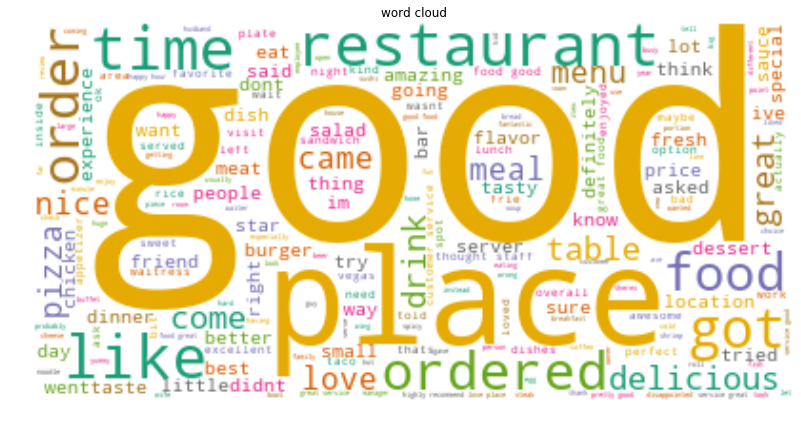

In [79]:
wordcloud =wc.generate(text1)
plt.rcParams['figure.figsize'] = [16, 7]
plt.imshow(wordcloud, interpolation='bilinear')    
plt.subplot(1,1,1)
plt.axis("off")
plt.title('word cloud')

In [80]:
#further clean with stop words
r_reviews.text = r_reviews.text.apply(lambda x:' '.join(x for x in x.split() if not x in stopwords))

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [81]:
#approach 1: using Doc2vec+k-means clustering
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [82]:
LabeledSentence1 = gensim.models.doc2vec.TaggedDocument
all_content_train = []
j=0
for em in r_reviews['text'].values:
    all_content_train.append(LabeledSentence1(em,[j]))
    j+=1
print('Number of texts processed: ', j)

Number of texts processed:  27206


In [83]:
model = Doc2Vec(vector_size=100, dbow_words= 1, dm=0, epochs=1,  window=5, seed=42, min_count=5, workers=40,alpha=0.025, min_alpha=0.025)

In [84]:
model.build_vocab(all_content_train)

In [85]:
count = len(r_reviews)
for epoch in range(10):
    if epoch%5 == 0:
        print("epoch "+str(epoch))
    model.train(all_content_train, total_examples=count, epochs=1)
    model.save('doc2vec.model')
    if epoch%5 == 0:
        model.alpha -= 0.002  # decrease the learning rate
        model.min_alpha = model.alpha 

epoch 0
epoch 5


In [86]:
fname = "doc2vec.model"
model = Doc2Vec.load(fname)

In [87]:
from sklearn.cluster import KMeans

In [88]:
#elbow evealuate
test1=np.arange(start=2,stop=30,step=2)
clustering_1=pd.DataFrame()
for t in test1:
    kmeans=KMeans(n_clusters=t,random_state=42)
    kmeans.fit(model.docvecs.vectors_docs)
    df_temp=pd.DataFrame({'clusters':[t],'sse':[kmeans.inertia_]})
    clustering_1=clustering_1.append(df_temp)

Text(0.5, 1.0, 'clustering group')

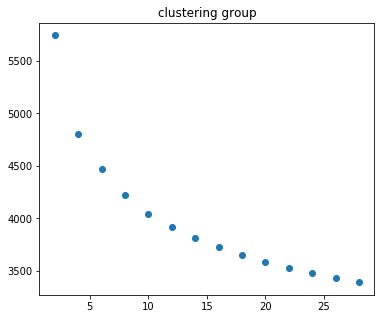

In [89]:
#plot results
plt.figure(figsize=(6,5))
plt.scatter(clustering_1['clusters'],clustering_1['sse'])
plt.title('clustering group')

In [90]:
#test with 6 clusters
kmeans_model=KMeans(n_clusters=6, init='k-means++',max_iter=100)
kmeans_model.fit(model.docvecs.vectors_docs)
clusters = kmeans_model.labels_.tolist()

In [91]:
r_reviews['doc2vec_label']=clusters

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



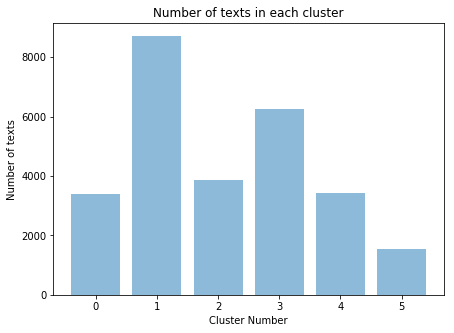

In [92]:
plt.figure(figsize=(7,5))
plt.bar(range(0,6), [r_reviews['doc2vec_label'].value_counts()[i] for i in range(0, 6)], align='center', alpha=0.5)
plt.ylabel('Number of texts')
plt.xlabel('Cluster Number')
plt.title('Number of texts in each cluster')
plt.show()

In [93]:
#getting topic words
from collections import Counter
print('top terms per cluster:')
print()
order_centroids=kmeans_model.cluster_centers_.argsort()[:,::-1]
for i in range(0,6):
    titles=r_reviews[r_reviews['doc2vec_label']==i]
    words=[x for x in titles['text']]
    count = Counter(' '.join(words))
    count = Counter(' '.join(words).split(' '))
    s = ''
    print('Cluster '+str(i)+' words:')

    for i in  count.most_common()[:20]:
        s += i[0]+" "
    print(s+'\n')

top terms per cluster:

Cluster 0 words:
food good place like service great time ordered chicken restaurant order got came menu delicious dont try didnt nice definitely 

Cluster 1 words:
food great good place service time best delicious like love friendly staff chicken definitely nice amazing restaurant come try menu 

Cluster 2 words:
food good place great service like time ordered chicken order came got restaurant try menu dont nice im delicious didnt 

Cluster 3 words:
food good great place service time chicken like best delicious love nice restaurant friendly staff definitely got ordered order try 

Cluster 4 words:
pizza food amazing place good great service time like best delicious ordered love definitely order got chicken try nice friendly 

Cluster 5 words:
food good like place time restaurant ordered came service order chicken great got menu didnt table im said sauce dont 



In [94]:
#visualize with PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=2).fit(model.docvecs.vectors_docs)

In [95]:
datapoint=pca.transform(model.docvecs.vectors_docs)

In [96]:
label=kmeans_model.labels_

In [97]:
centroids=kmeans_model.cluster_centers_
centroidpoint=pca.transform(centroids)

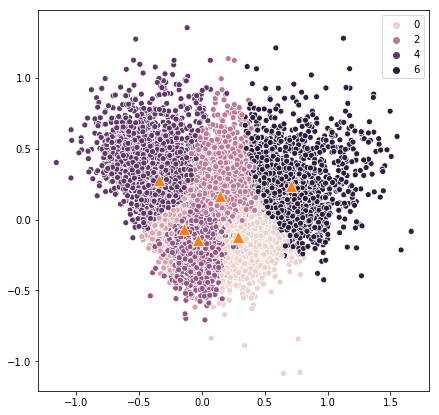

In [98]:
import seaborn as sns
plt.figure(figsize=(7,7))
sns.scatterplot(datapoint[:,0],datapoint[:,1],hue=label)
sns.scatterplot(centroidpoint[:, 0], centroidpoint[:, 1], marker='^',s=150)

#Approach2: TF-IDF +kmeans

In [99]:
texts=r_reviews['text'].tolist()

In [100]:
stemmer = SnowballStemmer("english")
def tokenize_only(text):
    filtered_tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    return filtered_tokens

In [101]:
def tokenize_and_stem(text):
    filtered_tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [102]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in texts:
    allwords_stemmed = tokenize_and_stem(i)
    totalvocab_stemmed.extend(allwords_stemmed)
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [103]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print ('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 1122807 items in vocab_frame


In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=10, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(texts)

print(tfidf_matrix.shape)

/opt/conda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:301: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.



CPU times: user 51.1 s, sys: 272 ms, total: 51.3 s
Wall time: 51.3 s
(27206, 18170)


In [105]:
terms = tfidf_vectorizer.get_feature_names()

In [106]:
num_clusters = 6
km = KMeans(n_jobs=-1, n_clusters=num_clusters, random_state = 42)
%time km.fit(tfidf_matrix)
TF_cluster = km.labels_.tolist()

CPU times: user 176 ms, sys: 304 ms, total: 480 ms
Wall time: 14min 26s


In [107]:
r_reviews['TF_cluster']=TF_cluster

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [108]:
print("Top terms per cluster:")
print()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(6):
    print('Cluster '+str(i)+' words:')
    s = ""
    for ind in order_centroids[i, :40]:
        s+=str(vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0])+' '
    print(s)
    print( )

Top terms per cluster:

Cluster 0 words:
greatness food service place greatness greatness food friends good service loved time amazing staff greatness atmosphere recommend definitely price best come delicious restaurant drink awesome nice experience tried excellent beer servers spot menu high selected food place family bar enjoy 

Cluster 1 words:
chicken fried good ordered burgers sauces like rice food noodles place tried tasted soup dishes flavor got delicious salad time restaurant greatness spicy beef pork cheese loved meat come service nice pretty thai came meal eat shrimp menu little fried 

Cluster 2 words:
food place good loved service best amazing friends time delicious like tried restaurant nice come staff price definitely recommend breakfast fresh menu ive eat excellent sandwich ordered vegas little enjoy favorite greatness tasted sushi location dont im better drink looks 

Cluster 3 words:
pizza crust ordered good place greatness time pizza like sauces tried cheese best best

In [109]:
r_reviews_c5=r_reviews.loc[r_reviews.TF_cluster==5].groupby('categories').size().reset_index(name='count').sort_values('count', ascending=False)
r_reviews_c5

categories  count
1099                                                                                                                                  Sandwiches, Restaurants, Breakfast & Brunch     85
123                                                                                                                                                         Barbeque, Restaurants     56
888                                                                                                    Restaurants, Desserts, Salad, Food, Pizza, Burgers, American (Traditional)     54
654                                                                                                                                                          Mexican, Restaurants     46
194                                                              Breakfast & Brunch, American (Traditional), African, Restaurants, Bars, Pubs, Burgers, Nightlife, American (New)     44
537                                                                                                         Gastropubs, Nightlife, Restaurants, American (New), Bars, Sports Bars     41
408                                               Event Planning & Services, Party & Event Planning, American (New), Nightlife, Active Life, Golf, Restaurants, Bars, Sports Bars     39
1180                                                                                                                                                     Steakhouses, Restaurants     38
701                                                                                             Nightlife, Lounges, Restaurants, Bars, American (Traditional), Breakfast & Brunch     34
968                                                                                                                                                          Restaurants, Mexican     32
865                                                                                                                                                          Restaurants, Chinese     31
4               American (New), American (Traditional), Bars, Venues & Event Spaces, Event Planning & Services, Steakhouses, Gastropubs, Restaurants, Seafood, Burgers, Nightlife     30
298                                                     Casinos, Dance Clubs, Bars, Active Life, Zoos, Arts & Entertainment, Nightlife, Music Venues, Swimming Pools, Restaurants     27
1194                                                                                                                                            Sushi Bars, Restaurants, Japanese     26
823                                                                                                                                               Restaurants, Breakfast & Brunch     26
1142                    Shopping Centers, Resorts, Arts & Entertainment, Hotels, Shopping, Event Planning & Services, Automotive, Restaurants, Hotels & Travel, Casinos, Car Wash     24
334                                                                                                                                                          Chinese, Restaurants     23
15                                                                                                                                           American (New), Buffets, Restaurants     23
200                                                   Breakfast & Brunch, Burgers, Gastropubs, Southern, Cocktail Bars, Restaurants, Sports Bars, Bars, Nightlife, American (New)     22
362   Comfort Food, American (New), Restaurants, Bars, Breakfast & Brunch, Wine Bars, Tapas/Small Plates, Burgers, Nightlife, Cocktail Bars, Beer, Wine & Spirits, Food, Beer Bar     22
993                                                                                                                                                            Restaurants, Pizza     22
750                                                                                              

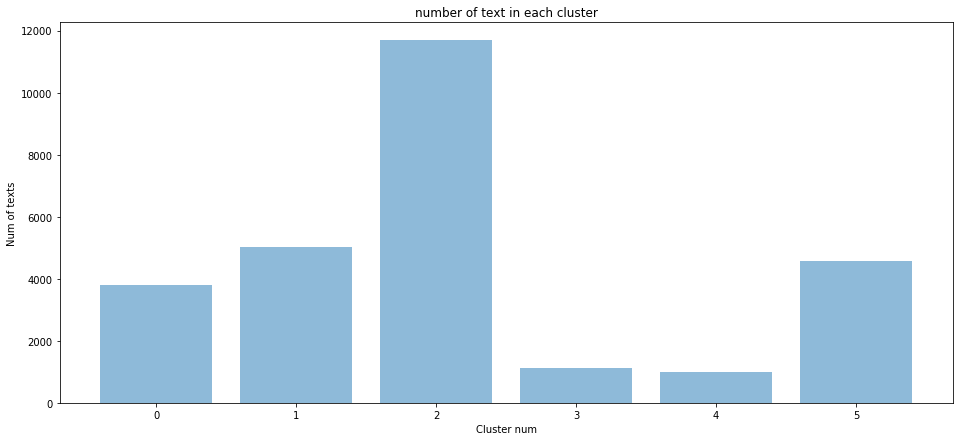

In [110]:
plt.bar(range(0,6),[r_reviews['TF_cluster'].value_counts()[i] for i in range(0,6)],align='center',alpha=0.5)
plt.ylabel('Num of texts')
plt.xlabel('Cluster num')
plt.title('number of text in each cluster')
plt.show()                     

In [111]:
#Approach 3 bag of words--LDA

In [112]:
tokenized_text=[tokenize_and_stem(text)for text in texts]
texts=[[word for word in text if word not in stopwords] for text in tokenized_text]

In [113]:
from gensim import corpora,models,similarities
dictionary=corpora.Dictionary(texts)

In [114]:
dictionary.filter_extremes(no_below=5,no_above=0.8)
corpus=[dictionary.doc2bow(text) for text in texts]

In [115]:
lda=models.LdaMulticore(corpus,num_topics=6,workers=40,id2word=dictionary,chunksize=10000,
                       passes=100)

In [116]:
for idx,topic in lda.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx,topic))

Topic: 0 Word: 0.021*"order" + 0.019*"food" + 0.015*"time" + 0.014*"wait" + 0.011*"servic" + 0.011*"ask" + 0.010*"tabl" + 0.010*"minut" + 0.009*"place" + 0.008*"like"
Topic: 1 Word: 0.017*"chicken" + 0.017*"food" + 0.017*"good" + 0.016*"order" + 0.016*"place" + 0.013*"rice" + 0.011*"like" + 0.010*"dish" + 0.010*"tri" + 0.010*"noodl"
Topic: 2 Word: 0.039*"food" + 0.038*"great" + 0.024*"servic" + 0.023*"place" + 0.017*"friend" + 0.017*"good" + 0.013*"love" + 0.012*"amaz" + 0.012*"time" + 0.012*"staff"
Topic: 3 Word: 0.026*"pizza" + 0.024*"place" + 0.022*"good" + 0.019*"taco" + 0.018*"food" + 0.012*"like" + 0.011*"tri" + 0.011*"order" + 0.010*"great" + 0.009*"love"
Topic: 4 Word: 0.016*"burger" + 0.016*"good" + 0.014*"fri" + 0.014*"sandwich" + 0.012*"place" + 0.010*"egg" + 0.010*"tri" + 0.010*"like" + 0.009*"order" + 0.009*"breakfast"
Topic: 5 Word: 0.017*"salad" + 0.015*"order" + 0.013*"good" + 0.010*"chicken" + 0.010*"like" + 0.009*"steak" + 0.009*"tast" + 0.008*"sauc" + 0.008*"meal" + 

In [117]:
#get result out
sent_topics_df = pd.DataFrame()
for i,row_list in enumerate(lda[corpus]):
    row=row_list[0] if lda.per_word_topics else row_list
    row=sorted(row,key=lambda x:(x[1]),reverse=True)
    for j,(topic_num,prop_topic) in enumerate(row):
        if j==0:
            wp=lda.show_topic(topic_num)
            topic_keywords=",".join([word for word,prop in wp])
            sent_topics_df=sent_topics_df.append(pd.Series([int(topic_num),round(prop_topic,4),topic_keywords]),ignore_index=True)
        else: 
            break
sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

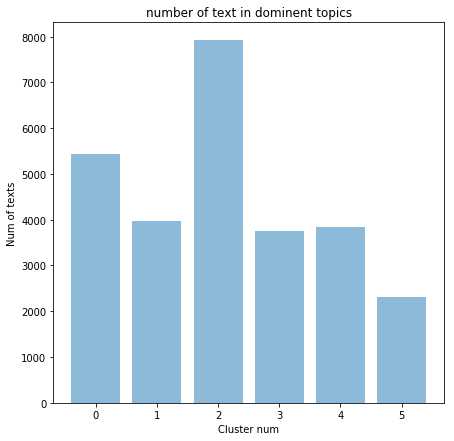

In [118]:
plt.figure(figsize=(7,7))
plt.bar(range(0,6),[sent_topics_df.Dominant_Topic.value_counts()[i] for i in range(0,6)],align='center',alpha=0.5)
plt.ylabel('Num of texts')
plt.xlabel('Cluster num')
plt.title('number of text in dominent topics')
plt.show()  

In [119]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [120]:
viz=pyLDAvis.gensim.prepare(lda,corpus,dictionary)
viz

/opt/conda/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.161360 -0.136359       1        1  24.754301
2      0.120468  0.119628       2        1  20.687464
1     -0.077641  0.013279       3        1  14.834285
4     -0.088569  0.045112       4        1  14.816253
5     -0.113277 -0.112861       5        1  12.962002
3     -0.002341  0.071200       6        1  11.945698, topic_info=     Category          Freq       Term         Total  loglift  logprob
term                                                                  
525   Default   3288.000000      pizza   3288.000000  30.0000  30.0000
370   Default  11747.000000      great  11747.000000  29.0000  29.0000
520   Default   2429.000000       taco   2429.000000  28.0000  28.0000
1346  Default   2688.000000     burger   2688.000000  27.0000  27.0000
9     Default   6189.000000    chicken   6189.000000  26.0000  26.0000
291   Default   3110.000000      salad   3110.000000  25.0000  25.0000
26    Default  19992.000000       food  19992.000000  24.0000  24.0000
286   Default  14988.000000      place  14988.000000  23.0000  23.0000
797   Default   2561.000000   sandwich   2561.000000  22.0000  22.0000
495   Default   2215.000000       rice   2215.000000  21.0000  21.0000
457   Default   4482.000000        fri   4482.000000  20.0000  20.0000
411   Default   2799.000000      minut   2799.000000  19.0000  19.0000
51    Default  13048.000000      order  13048.000000  18.0000  18.0000
50    Default   1525.000000      noodl   1525.000000  17.0000  17.0000
30    Default  14697.000000       good  14697.000000  16.0000  16.0000
348   Default   1482.000000      sushi   1482.000000  15.0000  15.0000
223   Default   1945.000000        egg   1945.000000  14.0000  14.0000
23    Default   3056.000000       dish   3056.000000  13.0000  13.0000
572   Default   2809.000000      chees   2809.000000  12.0000  12.0000
238   Default   1579.000000       roll   1579.000000  11.0000  11.0000
884   Default   1880.000000  breakfast   1880.000000  10.0000  10.0000
245   Default   1901.000000       soup   1901.000000   9.0000   9.0000
65    Default   3592.000000       sauc   3592.000000   8.0000   8.0000
505   Default   6064.000000       love   6064.000000   7.0000   7.0000
68    Default  10459.000000     servic  10459.000000   6.0000   6.0000
625   Default   1492.000000      steak   1492.000000   5.0000   5.0000
580   Default   4203.000000       amaz   4203.000000   4.0000   4.0000
1391  Default   1294.000000      coffe   1294.000000   3.0000   3.0000
249   Default   3748.000000        ask   3748.000000   2.0000   2.0000
453   Default   1736.000000  atmospher   1736.000000   1.0000   1.0000
...       ...           ...        ...           ...      ...      ...
564    Topic6    791.928589       chip   1026.304932   1.8656  -5.0837
1829   Topic6     99.868965    chicago    108.207306   2.0446  -7.1543
1422   Topic6    193.540039       pita    234.713898   1.9319  -6.4927
2714   Topic6    148.714172    chipotl    181.775238   1.9241  -6.7562
286    Topic6   3048.594238      place  14988.292969   0.5322  -3.7358
30     Topic6   2832.123047       good  14697.584961   0.4781  -3.8094
1052   Topic6    418.151794       bean    929.647095   1.3258  -5.7223
134    Topic6   1435.358398        tri   7152.909180   0.5187  -4.4890
28     Topic6    854.990967      fresh   3219.062988   0.7990  -5.0071
112    Topic6   1028.187134       best   4630.236328   0.6200  -4.8226
189    Topic6   1506.243896       like   9185.173828   0.3168  -4.4408
26     Topic6   2353.670898       food  19992.625000  -0.0146  -3.9945
505    Topic6   1176.868286       love   6064.057617   0.4853  -4.6876
115    Topic6    843.603699        ive   3533.451172   0.6925  -5.0205
65     Topic6    828.215942       sauc   3592.528320   0.6575  -5.0389
126    Topic6    815.021240         im   3741.506104   0.6008  -5.0550
42     Topic6    584.321716       meat   2097.

In [121]:
pyLDAvis.save_html(viz, 'lda.html')

 sentimental analysis

In [122]:
#create labels as per stars, <=3 label as 0, >3 label as 1
labels=r_reviews['stars_y'].map(lambda x : 1 if int(x) > 3 else 0)

In [123]:
#test the difference
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
vocabulary_size = 20000
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(r_reviews['text'])

sequences = tokenizer.texts_to_sequences(r_reviews['text'])
data = pad_sequences(sequences, maxlen=50)

In [124]:
print(data.shape)

(27206, 50)


approach 1:Build neural network with LSTM

In [141]:
from keras.models import Sequential
from keras.layers import Bidirectional, Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding

In [126]:
model_lstm = Sequential()
model_lstm.add(Embedding(20000, 100, input_length=50))
model_lstm.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [147]:
model_lstm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 50, 100)           2000000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 2,080,501
Trainable params: 2,080,501
Non-trainable params: 0
_________________________________________________________________


In [127]:
model_lstm.fit(data, np.array(labels), validation_split=0.4, epochs=3)

Train on 16323 samples, validate on 10883 samples
Epoch 1/3
16323/16323 [==============================] - 44s 3ms/step - loss: 0.3416 - acc: 0.8520 - val_loss: 0.2852 - val_acc: 0.8860
Epoch 2/3
16323/16323 [==============================] - 41s 3ms/step - loss: 0.1985 - acc: 0.9264 - val_loss: 0.2989 - val_acc: 0.8820
Epoch 3/3
16323/16323 [==============================] - 41s 2ms/step - loss: 0.1401 - acc: 0.9493 - val_loss: 0.3254 - val_acc: 0.8714


In [128]:
## Plot
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import matplotlib as plt

In [129]:
word_list = []
for word, i in tokenizer.word_index.items():
    word_list.append(word)

def plot_words(data, start, stop, step):
    trace = go.Scatter(
        x = data[start:stop:step,0], 
        y = data[start:stop:step, 1],
        mode = 'markers',
        text= word_list[start:stop:step]
    )
    layout = dict(title= 't-SNE 1 vs t-SNE 2',
                  yaxis = dict(title='t-SNE 2'),
                  xaxis = dict(title='t-SNE 1'),
                  hovermode= 'closest')
    fig = dict(data = [trace], layout= layout)
    py.iplot(fig)

In [130]:
from sklearn.manifold import TSNE


lstm_embds = model_lstm.layers[0].get_weights()[0]
lstm_tsne_embds = TSNE(n_components=2).fit_transform(lstm_embds)

In [131]:
plot_words(lstm_tsne_embds, 0, 20000, 1)

Build neural network with LSTM and CNN

In [132]:
def create_conv_model():
    model_conv = Sequential()
    model_conv.add(Embedding(vocabulary_size, 100, input_length=50))
    model_conv.add(Dropout(0.2))
    model_conv.add(Conv1D(64, 5, activation='relu'))
    model_conv.add(MaxPooling1D(pool_size=4))
    model_conv.add(LSTM(100))
    model_conv.add(Dense(1, activation='sigmoid'))
    model_conv.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model_conv

In [133]:
model_conv = create_conv_model()
model_conv.fit(data, np.array(labels), validation_split=0.4, epochs = 3)

Train on 16323 samples, validate on 10883 samples
Epoch 1/3
16323/16323 [==============================] - 24s 1ms/step - loss: 0.3502 - acc: 0.8448 - val_loss: 0.2853 - val_acc: 0.8824
Epoch 2/3
16323/16323 [==============================] - 21s 1ms/step - loss: 0.1876 - acc: 0.9290 - val_loss: 0.3138 - val_acc: 0.8776
Epoch 3/3
16323/16323 [==============================] - 21s 1ms/step - loss: 0.1040 - acc: 0.9643 - val_loss: 0.3913 - val_acc: 0.8694


In [135]:
conv_embds = model_conv.layers[0].get_weights()[0]
conv_tsne_embds = TSNE(n_components=2).fit_transform(conv_embds)

In [136]:
plot_words(conv_tsne_embds, 0, 2000, 1)

Bidirectional LSTM

In [152]:
model_bilstm = Sequential()
model_bilstm.add(Embedding(20000, 100, input_length=50))
model_bilstm.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
model_bilstm.add(Dense(1, activation='sigmoid'))
model_bilstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_bilstm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 50, 100)           2000000   
_________________________________________________________________
bidirectional_6 (Bidirection (None, 200)               160800    
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 201       
Total params: 2,161,001
Trainable params: 2,161,001
Non-trainable params: 0
_________________________________________________________________


In [153]:
model_bilstm.fit(data, np.array(labels), validation_split=0.4, epochs=3)

Train on 16323 samples, validate on 10883 samples
Epoch 1/3
16323/16323 [==============================] - 64s 4ms/step - loss: 0.3464 - acc: 0.8534 - val_loss: 0.2791 - val_acc: 0.8880
Epoch 2/3
16323/16323 [==============================] - 59s 4ms/step - loss: 0.1939 - acc: 0.9270 - val_loss: 0.2922 - val_acc: 0.8815
Epoch 3/3
16323/16323 [==============================] - 59s 4ms/step - loss: 0.1337 - acc: 0.9538 - val_loss: 0.3592 - val_acc: 0.8758


In [154]:
bilstm_embds = model_bilstm.layers[0].get_weights()[0]
bilstm_tsne_embds = TSNE(n_components=2).fit_transform(bilstm_embds)

In [155]:
plot_words(bilstm_tsne_embds, 0, 2000, 1)